In [16]:
import tensorflow as tf 
import keras

from keras.utils import plot_model
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

import pickle


%matplotlib inline

In [17]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
print(sess)

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1



In [3]:
"""
drawings - 0
engraving - 1 
iconography - 2 
painting - 3 
sculpture - 4 
"""

x = []
y = []

In [77]:
path = "../images/dataset/dataset_updated/training_set"
contador = 0

for filename in os.listdir(path):
    for filenameinterno in os.listdir(path + "/" + filename):
        x.append(cv.imread(path + "/" + filename + "/" + filenameinterno))
        y.append(contador)
    contador += 1

In [48]:
x_guardar = np.asarray(x)
y_guardar = np.asarray(y)

pickle.dump(x_guardar,open(r"D:\CS7\Machine Learning Models\artx.txt", "wb"))
pickle.dump(y_guardar,open(r"D:\CS7\Machine Learning Models\arty.txt", "wb"))

In [5]:
pre_x = pickle.load(open(r"D:\CS7\Machine Learning Models\artx.txt", "rb"))
pre_y = pickle.load(open(r"D:\CS7\Machine Learning Models\arty.txt", "rb"))

In [29]:
def clean_size(x,y,size):
    el = []
    for i in range(len(x)):
        if x[i] is None:
            el.append(i)
            continue
        else:
            x[i] = cv.resize(x[i],(size,size))
            x[i] = cv.cvtColor(x[i],cv.COLOR_BGR2RGB)
    x = np.array(list(np.delete(x,el)))
    y = np.delete(y,el)
    print("New shape of Dataset: ",x.shape)
    return (x,y)
    
sig_data = clean_size(pre_x,pre_y,64)
sig_x = sig_data[0]
sig_y = sig_data[1]

New shape of Dataset:  (8577, 64, 64, 3)


In [30]:
x_train,x_test,y_train,y_test = train_test_split(sig_x,sig_y,test_size=0.2,random_state=2)
x_train.shape

(6861, 64, 64, 3)

PRIMER MODELO

In [10]:
test1 = Sequential()

test1.add(Conv2D(32, (3,3), activation='relu', input_shape=(x_train.shape[1:])))
test1.add(MaxPooling2D(pool_size=(2,2)))
test1.add(Dropout(0.25))

test1.add(Conv2D(64, (3,3), activation='relu'))
test1.add(MaxPooling2D(pool_size=(2,2)))
test1.add(Dropout(0.25))

test1.add(Conv2D(128, (3,3), activation='relu'))
test1.add(MaxPooling2D(pool_size=(2,2)))
test1.add(Dropout(0.25))


test1.add(Flatten())
test1.add(Dense(256,activation='relu'))
test1.add(Dropout(0.25))
test1.add(Dense(128,activation='relu'))
test1.add(Dense(5,activation='softmax'))

test1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

print(test1.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 128)        

In [52]:
test1_train = test1.fit(x_train,y_train,
                    batch_size=32,
                    epochs=25,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Train on 5488 samples, validate on 1373 samples
Epoch 1/25
5488/5488 [==============================] - 3s 542us/step - loss: 3.6463 - accuracy: 0.4756 - val_loss: 1.3237 - val_accuracy: 0.4822
Epoch 2/25
5488/5488 [==============================] - 3s 468us/step - loss: 0.9226 - accuracy: 0.6470 - val_loss: 0.9142 - val_accuracy: 0.6446
Epoch 3/25
5488/5488 [==============================] - 3s 460us/step - loss: 0.8254 - accuracy: 0.6961 - val_loss: 0.8262 - val_accuracy: 0.7225
Epoch 4/25
5488/5488 [==============================] - 3s 464us/step - loss: 0.7518 - accuracy: 0.7278 - val_loss: 0.7309 - val_accuracy: 0.7232
Epoch 5/25
5488/5488 [==============================] - 3s 464us/step - loss: 0.6936 - accuracy: 0.7513 - val_loss: 0.6856 - val_accuracy: 0.7458
Epoch 6/25
5488/5488 [==============================] - 3s 465us/step - loss: 0.6553 - accuracy: 0.7622 - val_loss: 0.6888 - val_accuracy: 0.7407
Epoch 7/25
5488/5488 [==============================] - 3s 464us/step - loss

In [22]:
# VOLVER A ABRIR EL MODELO 

test1_train = pickle.load(open(r"./models/test1_test.txt", "rb"))
test1 = load_model("./models/test1.h5")

1716/1716 [==============================] - 1s 314us/step
Test score: 0.9354283048278524
Test accuracy: 0.6620046496391296


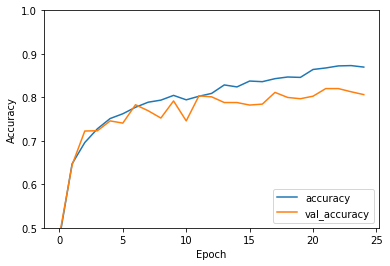

In [23]:
score, acc = test1.evaluate(x_test, y_test,
                            batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

plt.plot(test1_train.history['accuracy'], label='accuracy')
plt.plot(test1_train.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [24]:
#test1.save("./models/test1.h5")
#pickle.dump(test1_train,open(r"./models/test1_test.txt", "wb"))

In [63]:
test2 = Sequential()

test2.add(Conv2D(64, (3,3), activation='relu', input_shape=(x_train.shape[1:])))
test2.add(MaxPooling2D(pool_size=(2,2)))
test2.add(Dropout(0.25))

test2.add(Conv2D(64, (3,3), activation='relu'))
test2.add(MaxPooling2D(pool_size=(2,2)))
test2.add(Dropout(0.25))

test2.add(Conv2D(128, (3,3), activation='relu'))
test2.add(MaxPooling2D(pool_size=(2,2)))
test2.add(Dropout(0.25))


test2.add(Flatten())
test2.add(Dense(256,activation='relu'))
test2.add(Dense(5,activation='softmax'))

test2.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

print(test2.summary())

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_57 (Dropout)         (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_58 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 12, 12, 128)     

In [64]:
test2_train = test2.fit(x_train,y_train,
                    batch_size=32,
                    epochs=25,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Train on 5488 samples, validate on 1373 samples
Epoch 1/25
5488/5488 [==============================] - 3s 619us/step - loss: 6.4280 - accuracy: 0.5078 - val_loss: 1.1051 - val_accuracy: 0.5776
Epoch 2/25
5488/5488 [==============================] - 3s 551us/step - loss: 0.9338 - accuracy: 0.6534 - val_loss: 0.9805 - val_accuracy: 0.6744
Epoch 3/25
5488/5488 [==============================] - 3s 553us/step - loss: 0.8246 - accuracy: 0.6979 - val_loss: 0.8398 - val_accuracy: 0.6992
Epoch 4/25
5488/5488 [==============================] - 3s 557us/step - loss: 0.7262 - accuracy: 0.7363 - val_loss: 0.7518 - val_accuracy: 0.7553
Epoch 5/25
5488/5488 [==============================] - 3s 555us/step - loss: 0.6731 - accuracy: 0.7618 - val_loss: 0.7517 - val_accuracy: 0.7349
Epoch 6/25
5488/5488 [==============================] - 3s 553us/step - loss: 0.6053 - accuracy: 0.7810 - val_loss: 0.7245 - val_accuracy: 0.7210
Epoch 7/25
5488/5488 [==============================] - 3s 554us/step - loss

In [66]:
test2.save("./models/test2.h5")
pickle.dump(test2_train,open(r"./models/test2_test.txt", "wb"))

1716/1716 [==============================] - 0s 264us/step
Test score: 0.797521742073806
Test accuracy: 0.7937062978744507


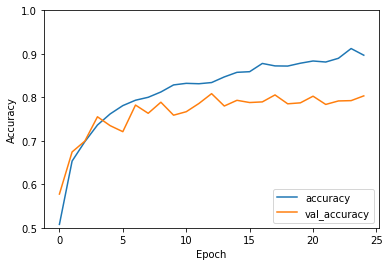

In [65]:
score, acc = test2.evaluate(x_test, y_test,
                            batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

plt.plot(test2_train.history['accuracy'], label='accuracy')
plt.plot(test2_train.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [94]:
# data augmentation test 

generador = ImageDataGenerator(width_shift_range=0.2,
                              height_shift_range=0.2,
                              rotation_range=25)
iterador = generador.flow(x_train,y_train, batch_size=32)

In [234]:
modelo = Sequential()

modelo.add(Conv2D(128, (3,3), activation='relu', input_shape=(x_train.shape[1:])))
modelo.add(Conv2D(128, (3,3), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Dropout(0.25))

modelo.add(Conv2D(64, (3,3), activation='relu'))
modelo.add(Conv2D(64, (3,3), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Dropout(0.25))

modelo.add(Conv2D(32, (3,3), activation='relu'))
modelo.add(Dropout(0.25))

modelo.add(Flatten())
modelo.add(Dense(128,activation='relu'))
modelo.add(Dropout(0.25))
modelo.add(Dense(64,activation='relu'))
modelo.add(Dense(5,activation='softmax'))

modelo.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

print(modelo.summary())

Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_257 (Conv2D)          (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_258 (Conv2D)          (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_148 (MaxPoolin (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_241 (Dropout)        (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_259 (Conv2D)          (None, 12, 12, 64)        73792     
_________________________________________________________________
conv2d_260 (Conv2D)          (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_149 (MaxPoolin (None, 5, 5, 64)        

In [225]:
modelo_train = modelo.fit(x_train,y_train,
                    batch_size=64,
                    epochs=65,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Train on 5488 samples, validate on 1373 samples
Epoch 1/65
5488/5488 [==============================] - 3s 468us/step - loss: 1.7604 - accuracy: 0.2648 - val_loss: 1.3716 - val_accuracy: 0.3693
Epoch 2/65
5488/5488 [==============================] - 2s 385us/step - loss: 1.3480 - accuracy: 0.4308 - val_loss: 1.2621 - val_accuracy: 0.5310
Epoch 3/65
5488/5488 [==============================] - 2s 387us/step - loss: 1.2118 - accuracy: 0.5301 - val_loss: 1.1127 - val_accuracy: 0.5747
Epoch 4/65
5488/5488 [==============================] - 2s 391us/step - loss: 1.0894 - accuracy: 0.5774 - val_loss: 1.0465 - val_accuracy: 0.5958
Epoch 5/65
5488/5488 [==============================] - 2s 391us/step - loss: 1.0527 - accuracy: 0.5835 - val_loss: 0.9999 - val_accuracy: 0.6133
Epoch 6/65
5488/5488 [==============================] - 2s 390us/step - loss: 1.0136 - accuracy: 0.5958 - val_loss: 0.9940 - val_accuracy: 0.5972
Epoch 7/65
5488/5488 [==============================] - 2s 393us/step - loss

1716/1716 [==============================] - 0s 135us/step
Test score: 0.6727404551350431
Test accuracy: 0.806526780128479


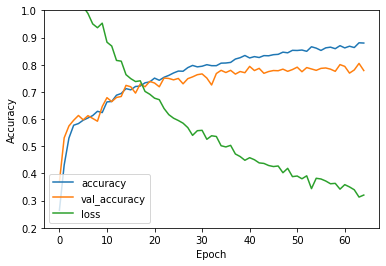

In [226]:
score, acc = modelo.evaluate(x_test, y_test,
                            batch_size=64)
print('Test score:', score)
print('Test accuracy:', acc)

plt.plot(modelo_train.history['accuracy'], label='accuracy')
plt.plot(modelo_train.history['val_accuracy'], label = 'val_accuracy')
plt.plot(modelo_train.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower left')

In [227]:
test2.save("./models/test3.h5")
pickle.dump(modelo_train,open(r"./models/test3_test.txt", "wb"))

In [257]:
generador_data = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.1,
    brightness_range=[0.2,1.0]
)

In [258]:
iterador = generador_data.flow(x_train,y_train, batch_size=32)

In [259]:
imagenes = [next(iterador)[0].astype(np.uint8) for i in range(5)]
type(imagenes[0])

numpy.ndarray

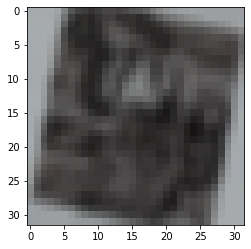

In [260]:
plt.imshow(imagenes[0][6,:,:])

In [264]:
test1 = Sequential()

test1.add(Conv2D(128, (3,3), activation='relu', input_shape=(x_train.shape[1:])))
test1.add(Conv2D(128, (3,3), activation='relu'))
test1.add(MaxPooling2D(pool_size=(2,2)))
test1.add(Dropout(0.25))

test1.add(Conv2D(64, (3,3), activation='relu'))
test1.add(Conv2D(64, (3,3), activation='relu'))
test1.add(MaxPooling2D(pool_size=(2,2)))
test1.add(Dropout(0.25))

test1.add(Conv2D(32, (3,3), activation='relu'))
test1.add(MaxPooling2D(pool_size=(2,2)))
test1.add(Dropout(0.25))

test1.add(Flatten())
test1.add(Dense(128,activation='relu'))
test1.add(Dropout(0.25))
test1.add(Dense(64,activation='relu'))
test1.add(Dense(5,activation='softmax'))

test1.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

print(test1.summary())

Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_269 (Conv2D)          (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_270 (Conv2D)          (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_155 (MaxPoolin (None, 14, 14, 128)       0         
_________________________________________________________________
dropout_252 (Dropout)        (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_271 (Conv2D)          (None, 12, 12, 64)        73792     
_________________________________________________________________
conv2d_272 (Conv2D)          (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_156 (MaxPoolin (None, 5, 5, 64)        

PROBAR EL MODELO 

In [31]:
modelo_final = load_model(r"./models/test3.h5")

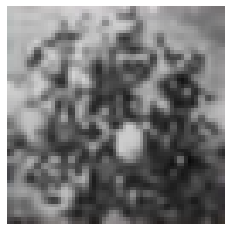

GUESS:  sculpture
REAL:  engraving


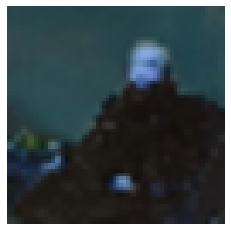

GUESS:  sculpture
REAL:  painting


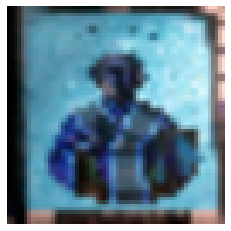

GUESS:  sculpture
REAL:  iconography


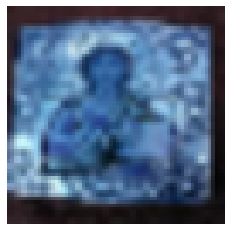

GUESS:  sculpture
REAL:  iconography


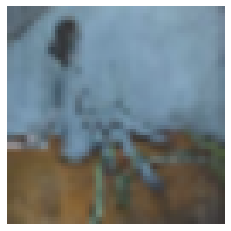

GUESS:  drawing
REAL:  painting


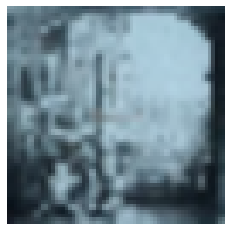

GUESS:  drawing
REAL:  engraving


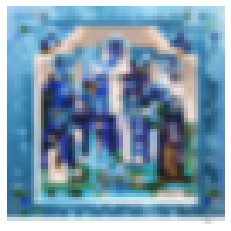

GUESS:  sculpture
REAL:  iconography


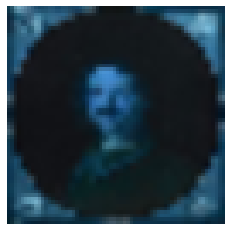

GUESS:  sculpture
REAL:  painting


In [36]:
posibilidades = ['drawing','engraving','iconography','painting','sculpture']
for i in range(8):
    number = np.random.randint(1,1500)
    test_image = x_test[number]
    transformed = cv.resize(test_image,(64,64))
    plt.imshow(cv.cvtColor(test_image,cv.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
    print("GUESS: ",posibilidades[np.argmax(modelo_final.predict(np.expand_dims(transformed,0)))])
    print("REAL: ", posibilidades[y_test[number]])

In [209]:
np.unique(pruebay,return_counts=True)

(array([0, 1, 2, 3, 4]), array([1229,  844, 2310, 2364, 1938], dtype=int64))

In [246]:
filtros = []
for i in fourth.layers:
    if "conv" not in i.name:
        continue
    filters,bias = i.get_weights()
    filtros.append(filters)
    print(filters.shape)

(3, 3, 3, 128)
(3, 3, 128, 64)
(3, 3, 64, 64)
(3, 3, 64, 32)
(3, 3, 32, 32)


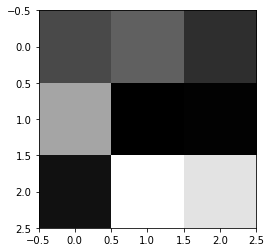

In [252]:
filters = filtros[0]
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
plt.imshow(filters[:,:,:,0][:,:,0],cmap='gray')

In [93]:
from keras.models import Model
#feature_model = Model(inputs=fourth.inputs, outputs=fourth.layers[2].output)

In [270]:
feature_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_158_input (InputLayer (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_158 (Conv2D)          (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_108 (MaxPoolin (None, 15, 15, 128)       0         
_________________________________________________________________
dropout_107 (Dropout)        (None, 15, 15, 128)       0         
Total params: 3,584
Trainable params: 3,584
Non-trainable params: 0
_________________________________________________________________


In [274]:
result = feature_model.predict(np.expand_dims(cv.resize(cv.imread('./test.jpg'),(32,32)),0))

In [275]:
result.shape

(1, 15, 15, 128)

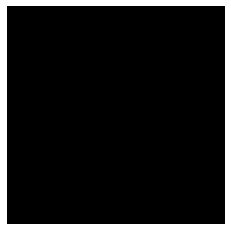

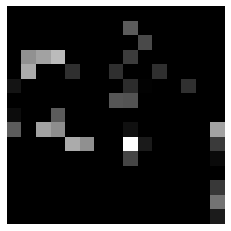

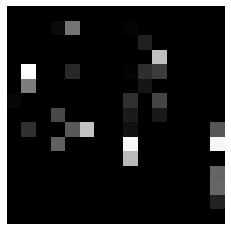

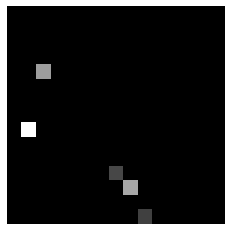

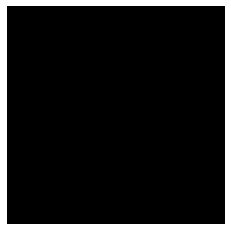

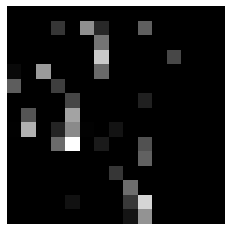

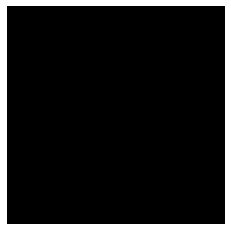

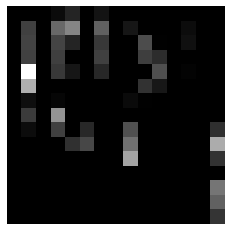

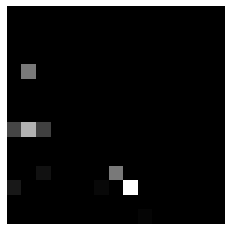

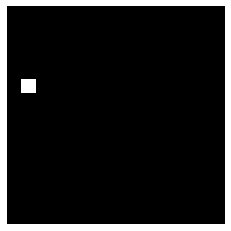

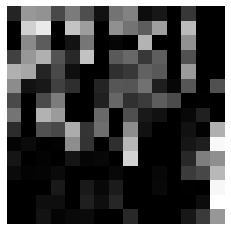

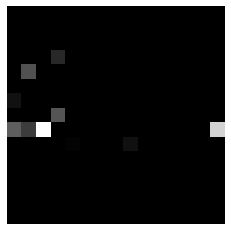

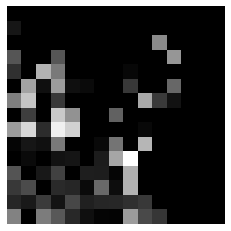

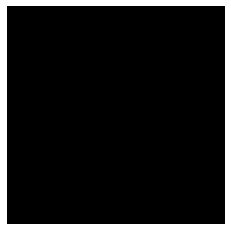

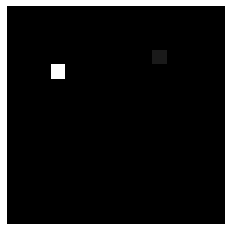

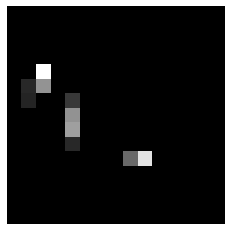

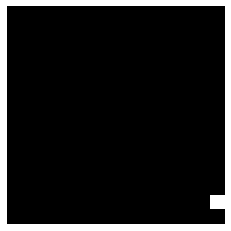

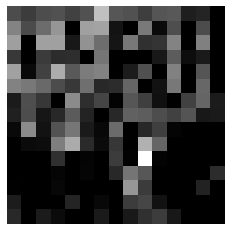

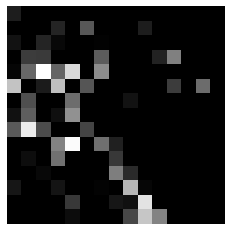

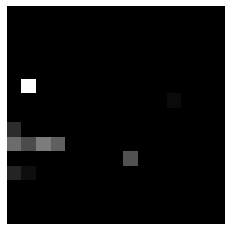

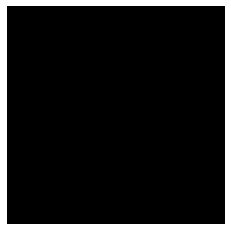

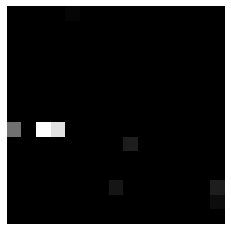

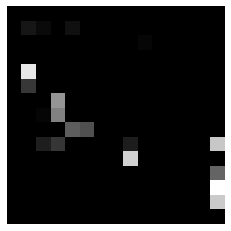

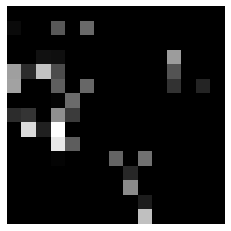

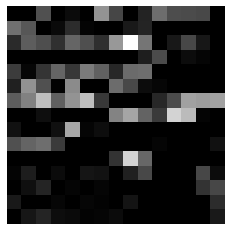

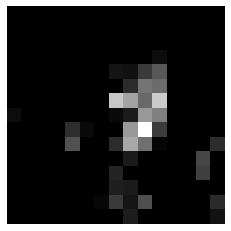

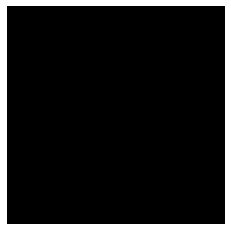

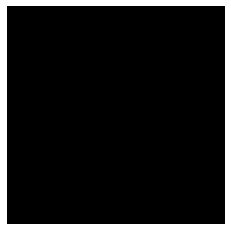

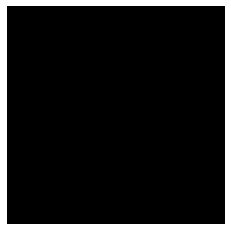

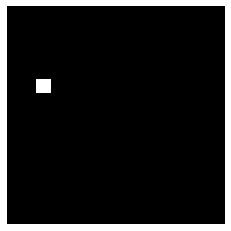

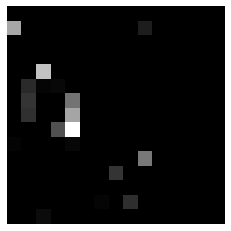

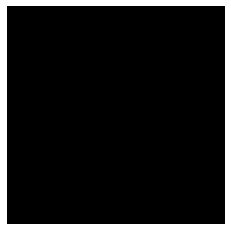

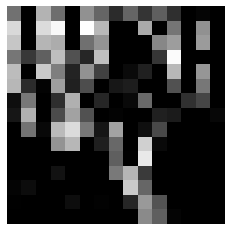

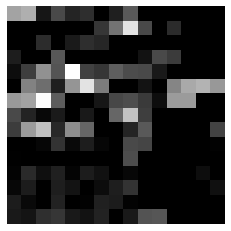

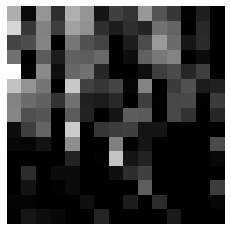

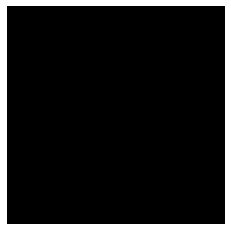

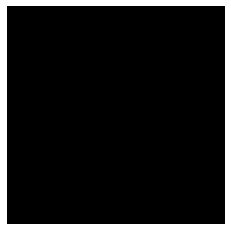

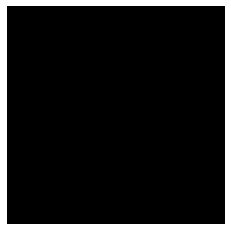

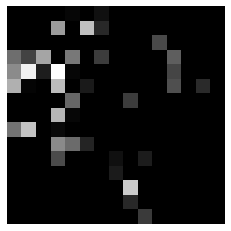

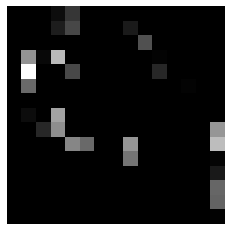

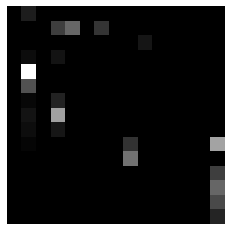

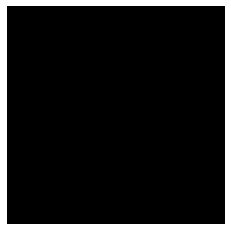

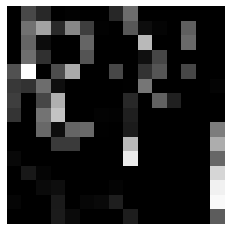

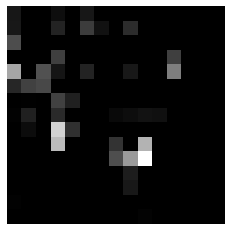

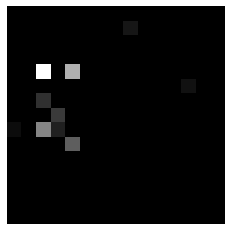

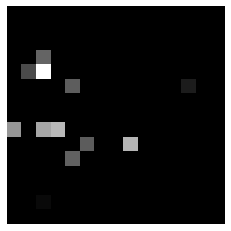

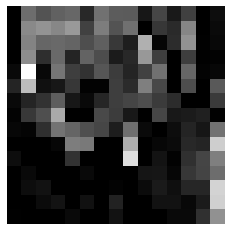

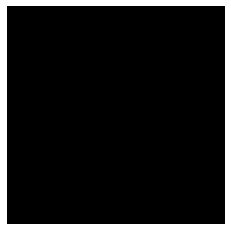

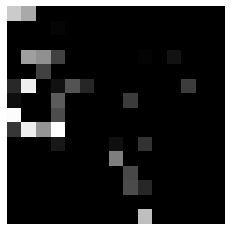

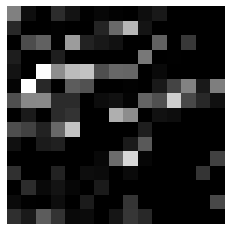

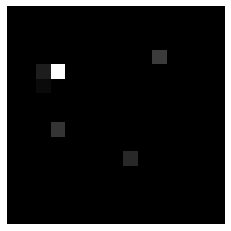

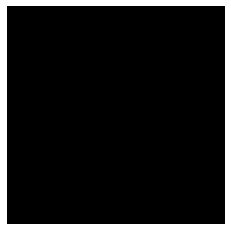

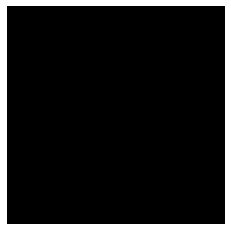

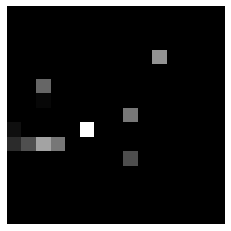

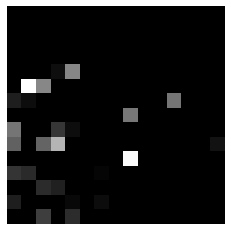

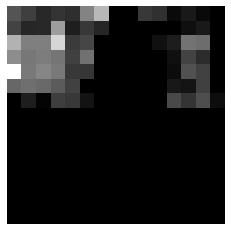

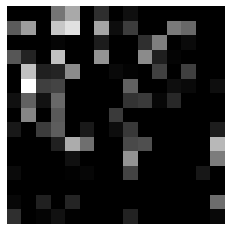

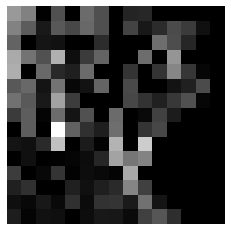

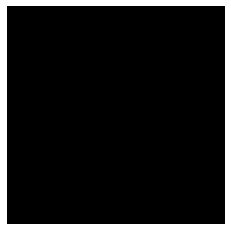

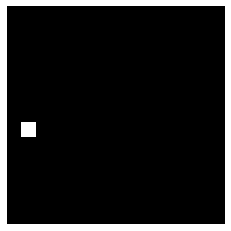

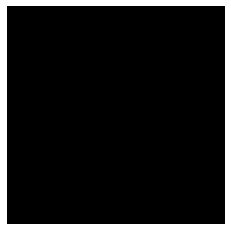

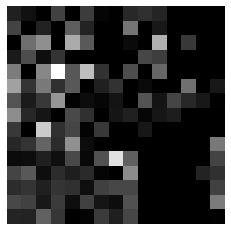

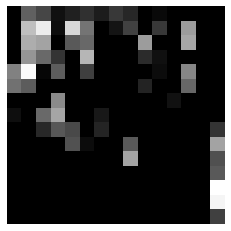

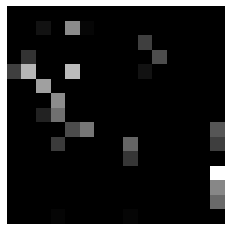

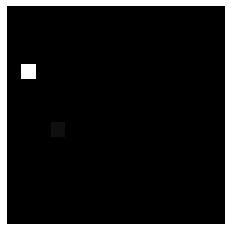

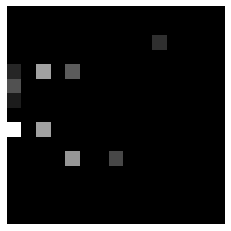

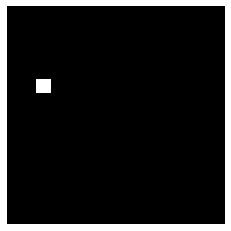

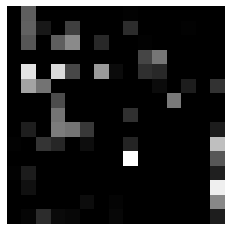

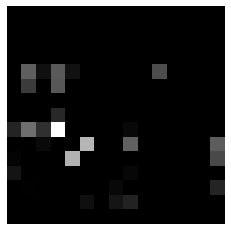

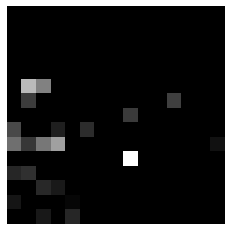

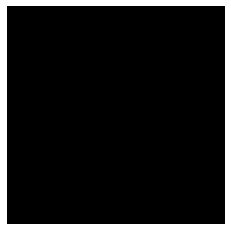

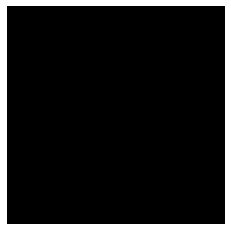

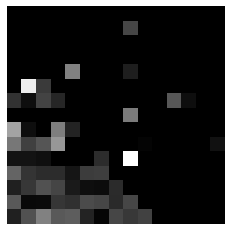

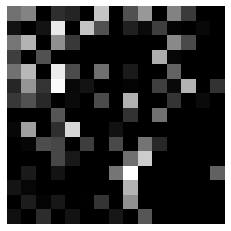

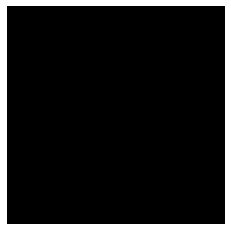

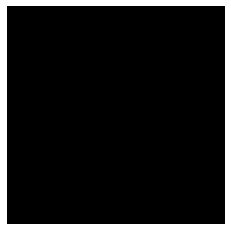

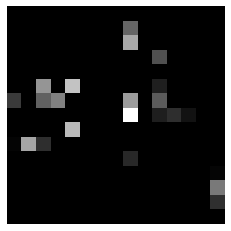

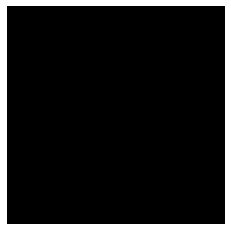

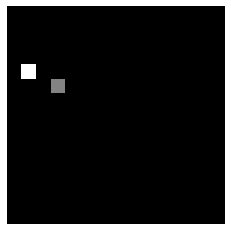

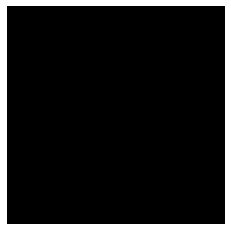

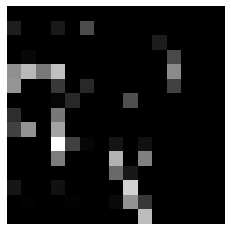

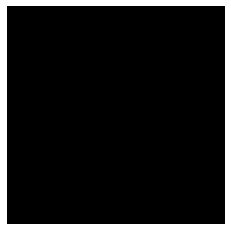

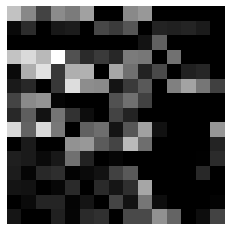

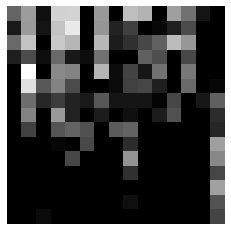

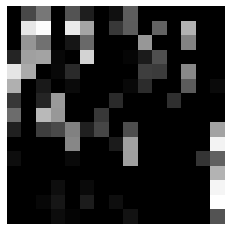

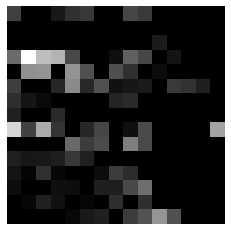

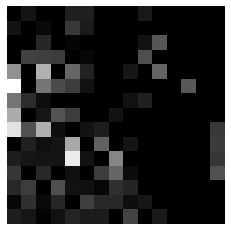

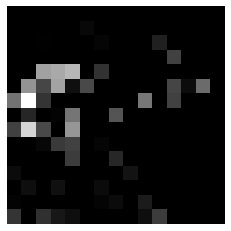

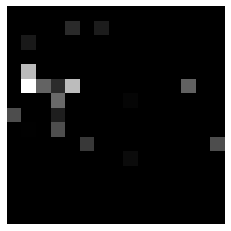

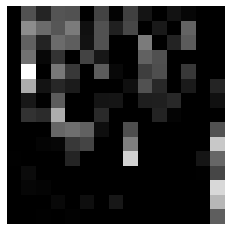

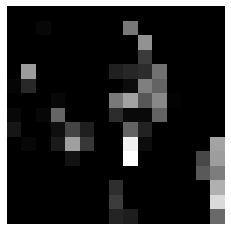

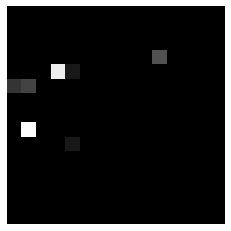

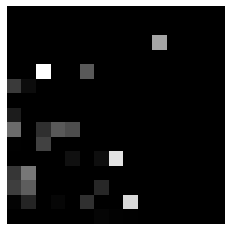

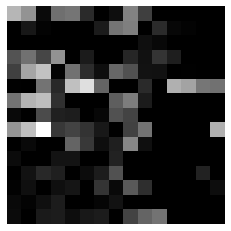

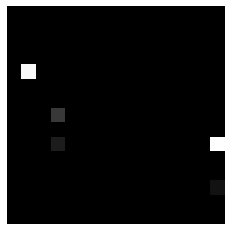

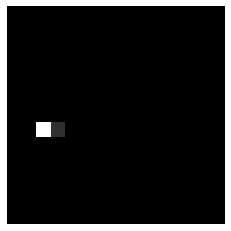

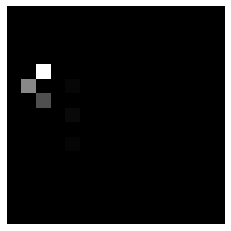

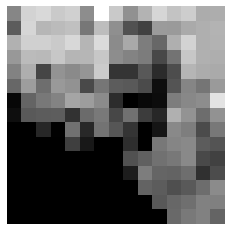

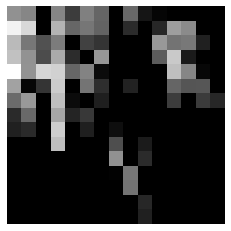

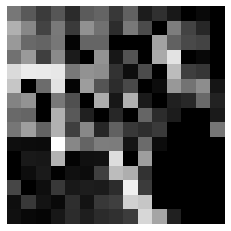

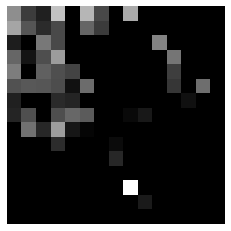

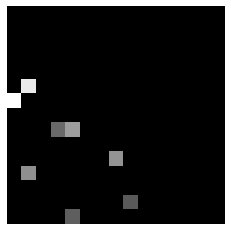

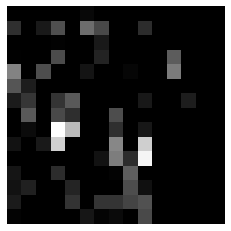

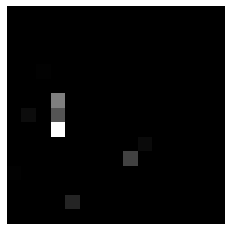

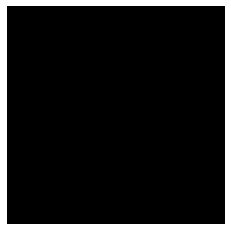

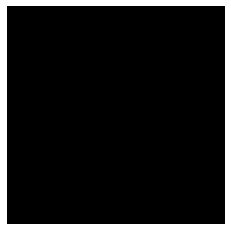

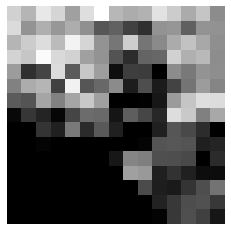

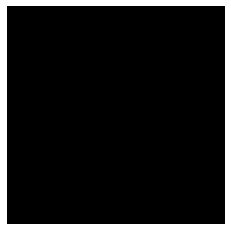

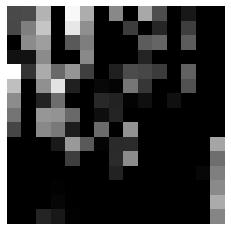

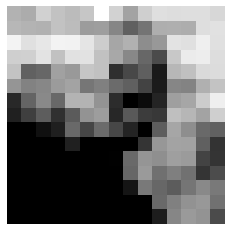

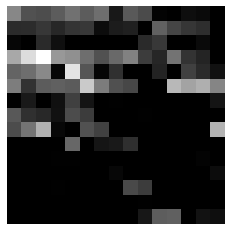

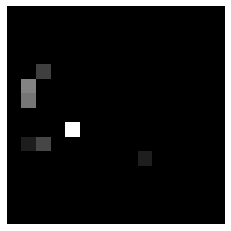

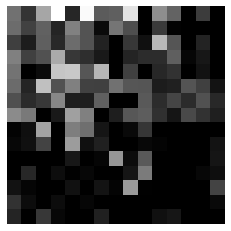

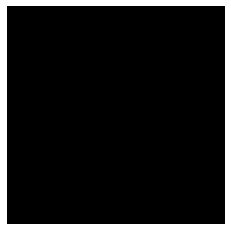

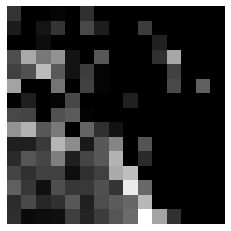

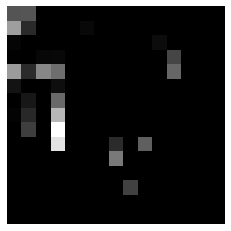

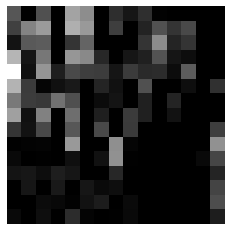

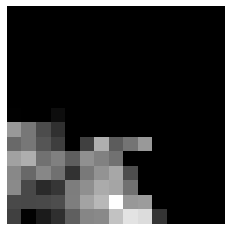

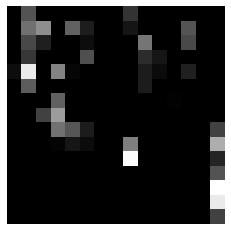

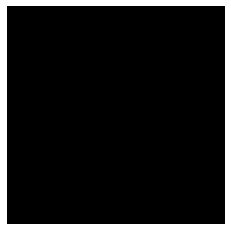

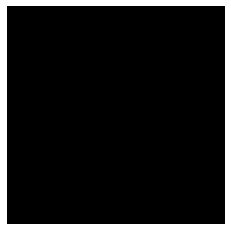

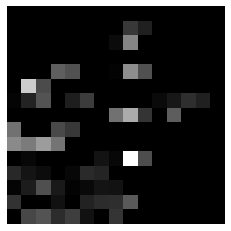

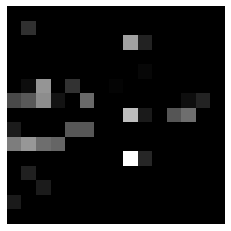

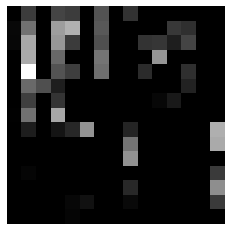

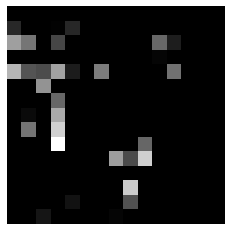

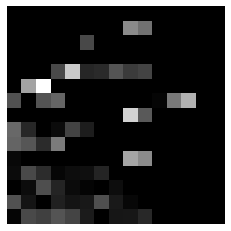

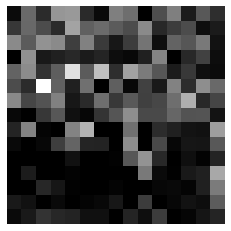

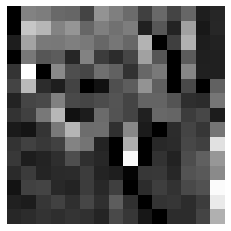

In [276]:
for i in range(128):
    plt.imshow(result[0,:,:,i],cmap="gray")
    plt.axis("off")
    plt.show()

In [4]:
from keras.models import load_model
ver = load_model("./fourth.h5")

In [120]:
outputs = []
for i in range(len(fourth2.layers)):
    if 'conv' in fourth2.layers[i].name:
        conv.append(fourth2.layers[i])
        print(i)

0
3
4
7
8


In [168]:
sacar = Model(inputs=fourth2.inputs, outputs=fourth2.layers[0].output)

In [169]:
test = cv.imread('./test.jpg')
test = cv.cvtColor(test,cv.COLOR_BGR2RGB)
test = np.expand_dims(cv.resize(test,(64,64)),0)
test.shape

(1, 64, 64, 3)

In [170]:
features = sacar.predict(test)

In [171]:
features.shape

(1, 62, 62, 128)

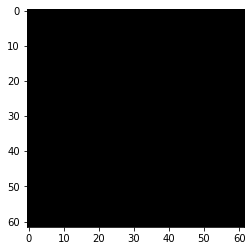

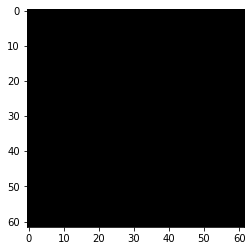

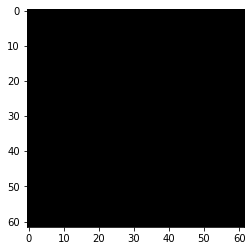

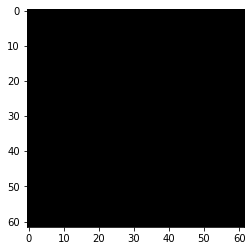

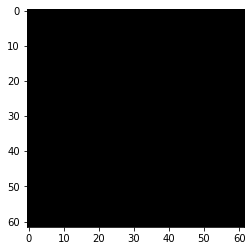

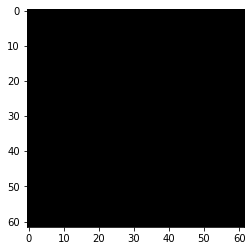

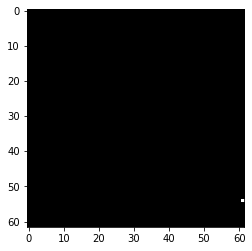

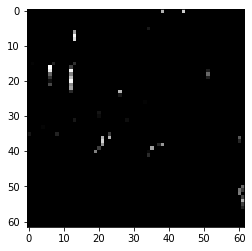

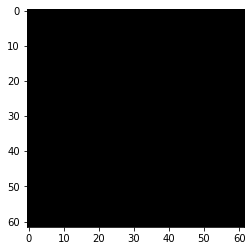

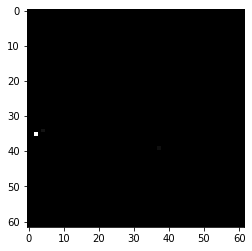

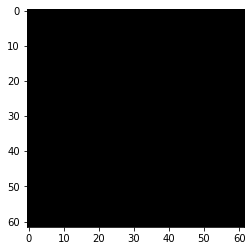

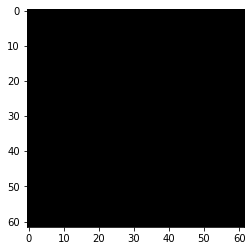

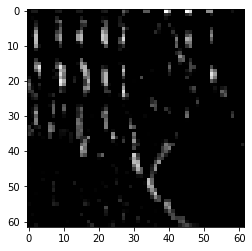

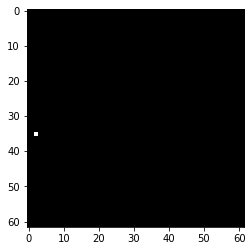

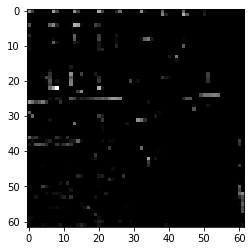

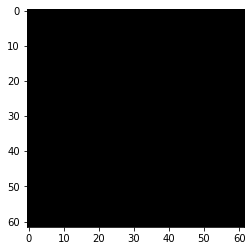

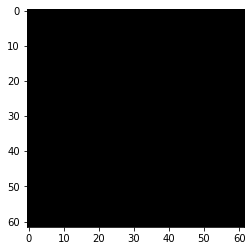

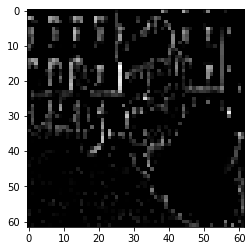

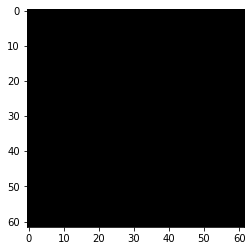

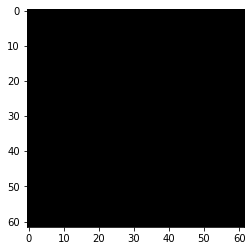

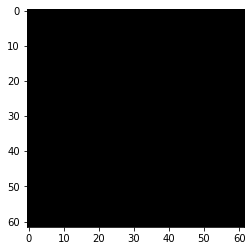

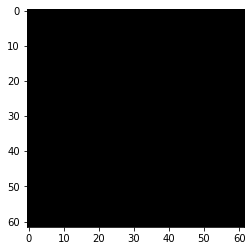

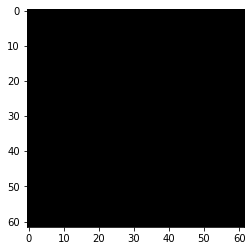

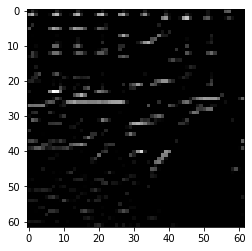

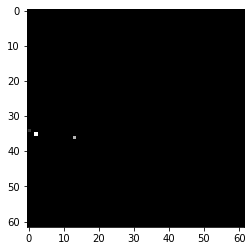

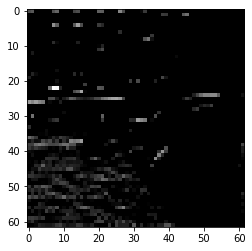

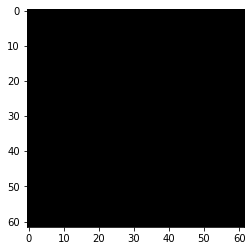

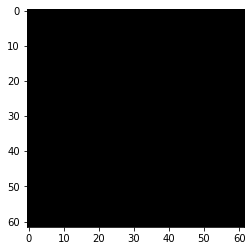

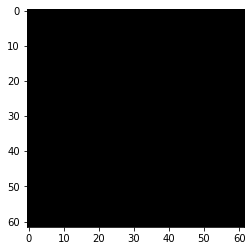

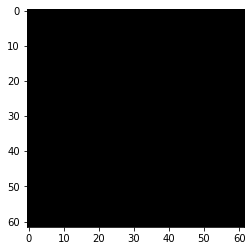

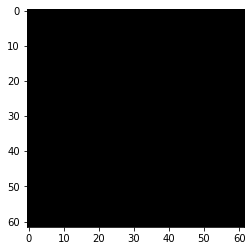

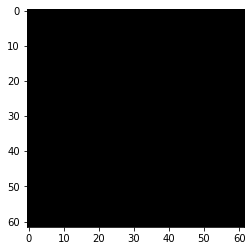

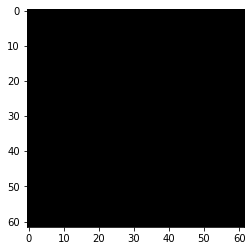

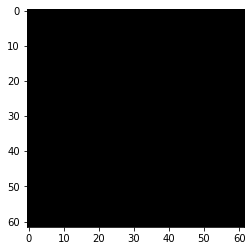

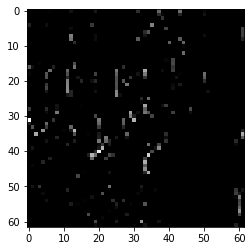

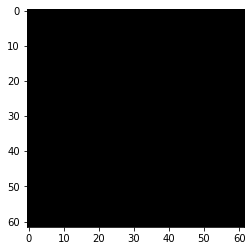

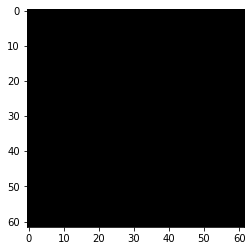

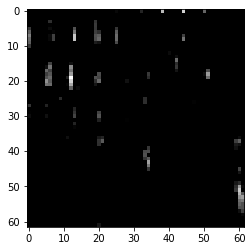

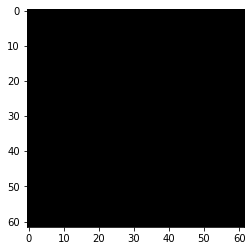

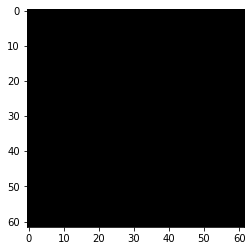

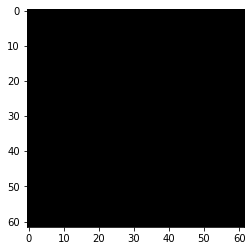

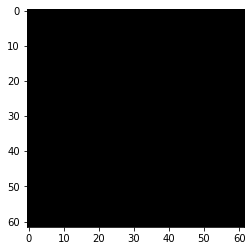

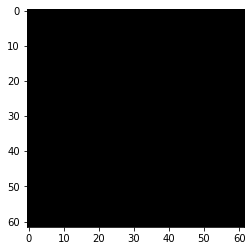

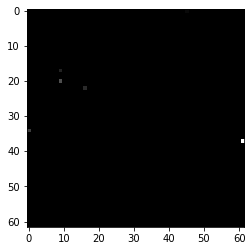

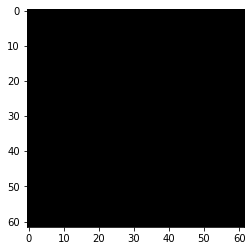

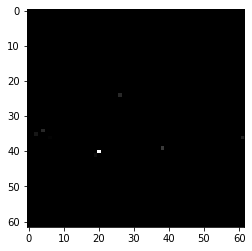

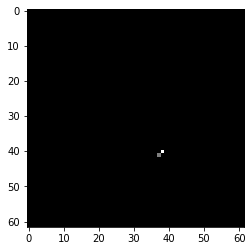

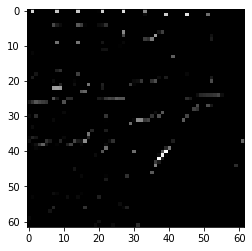

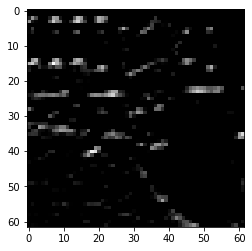

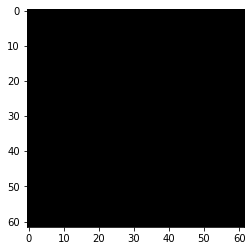

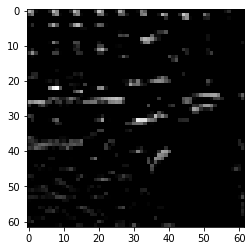

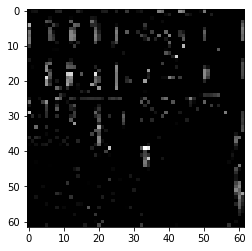

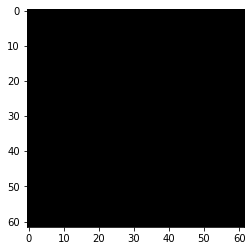

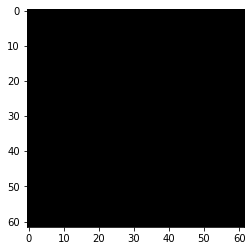

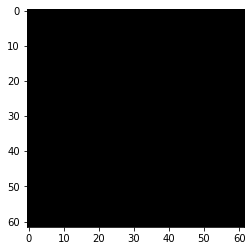

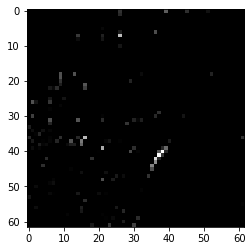

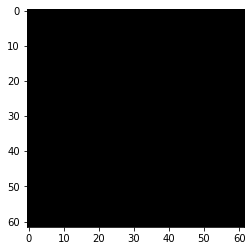

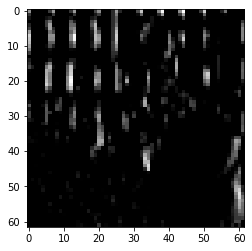

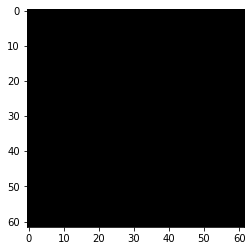

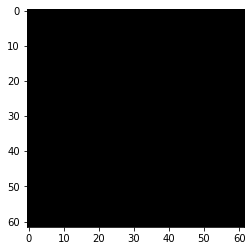

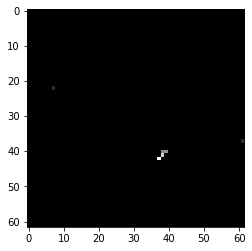

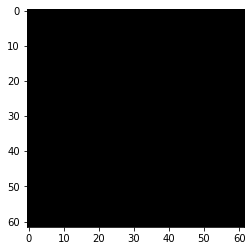

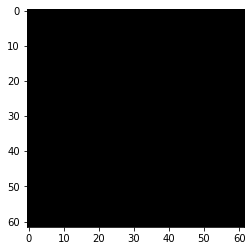

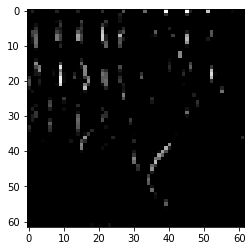

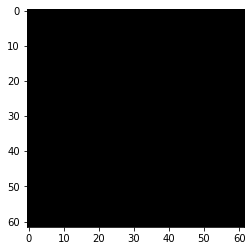

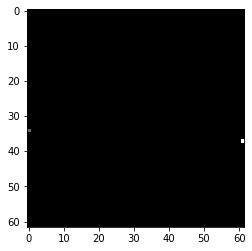

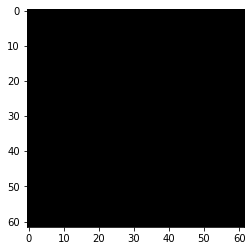

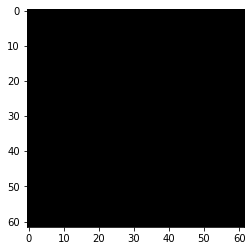

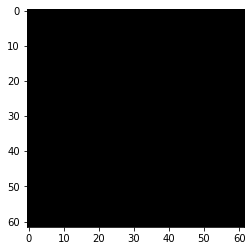

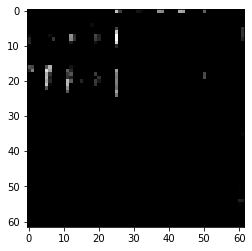

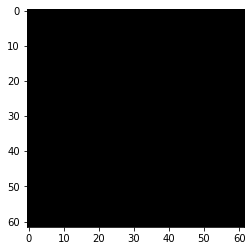

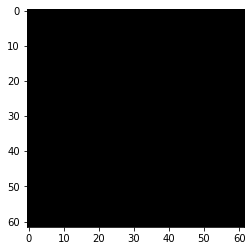

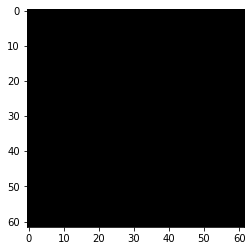

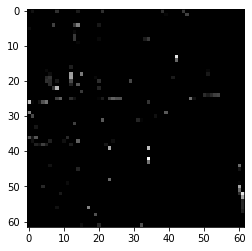

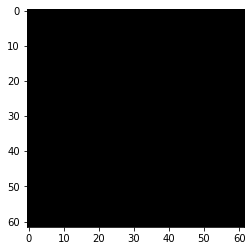

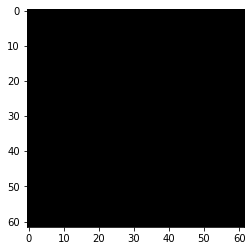

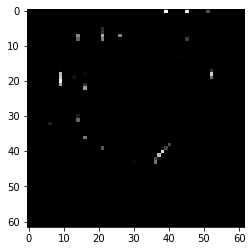

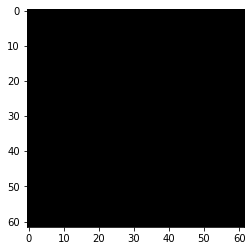

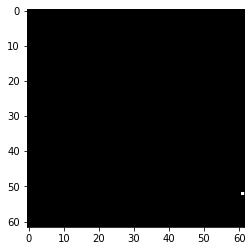

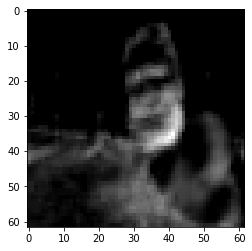

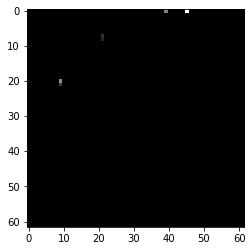

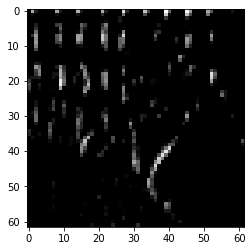

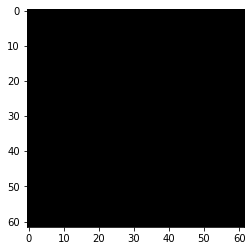

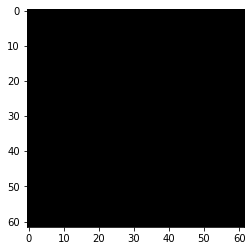

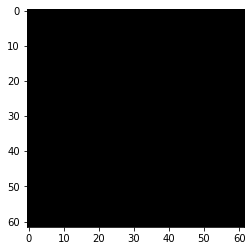

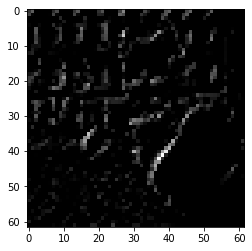

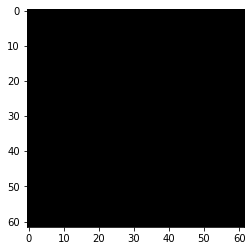

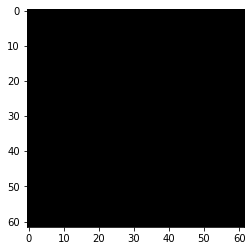

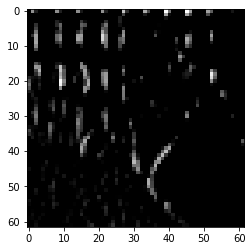

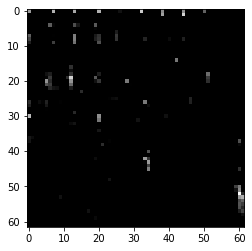

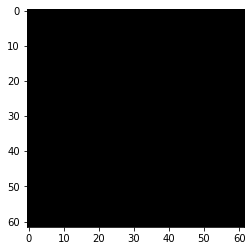

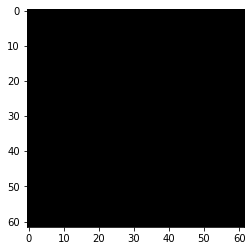

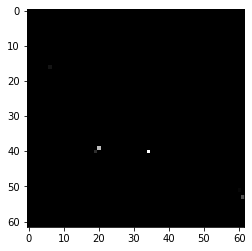

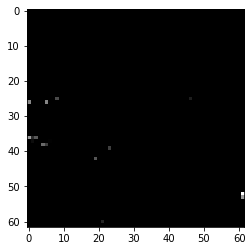

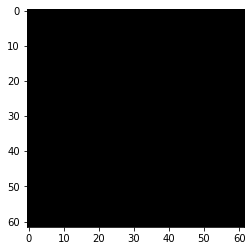

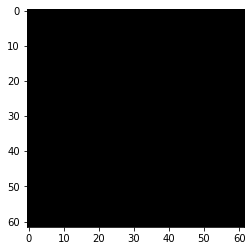

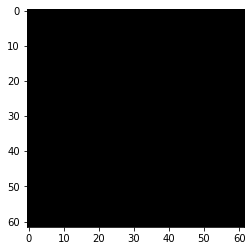

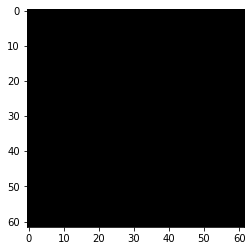

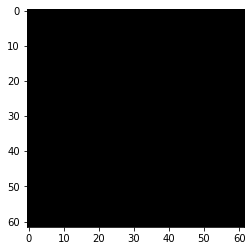

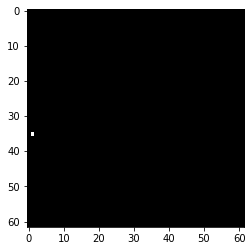

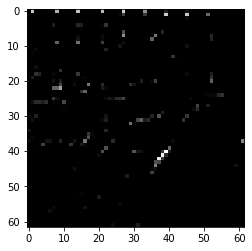

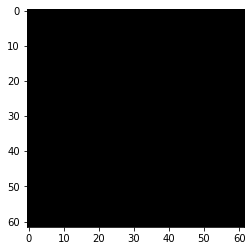

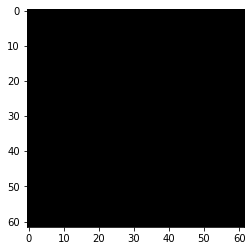

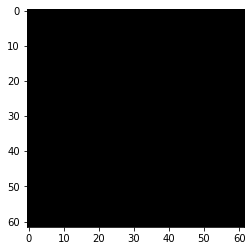

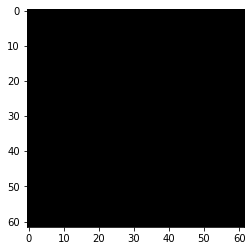

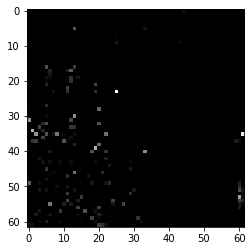

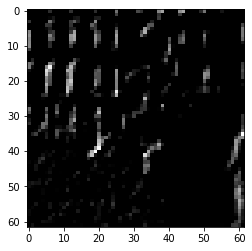

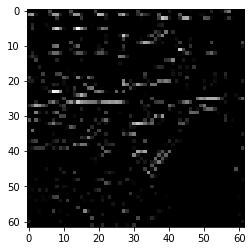

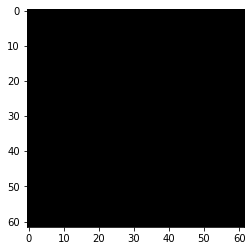

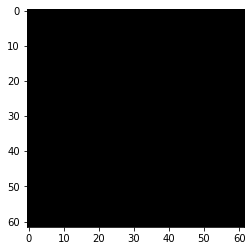

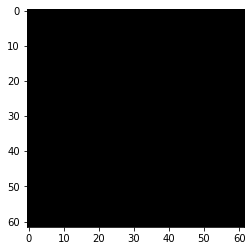

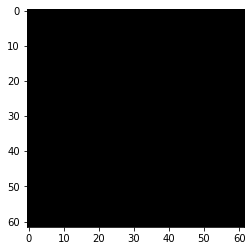

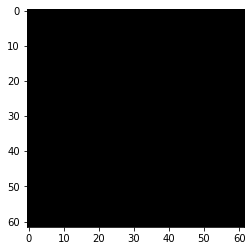

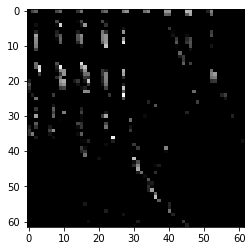

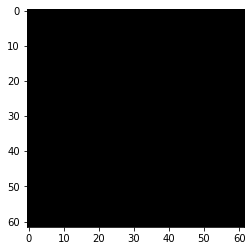

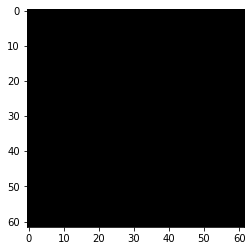

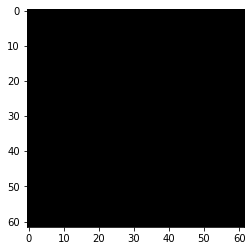

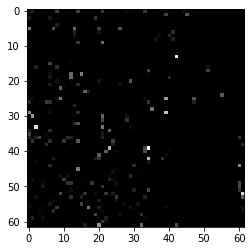

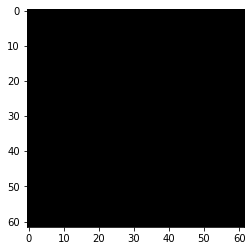

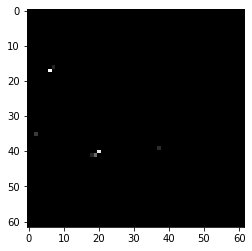

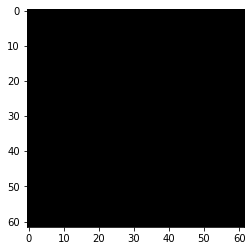

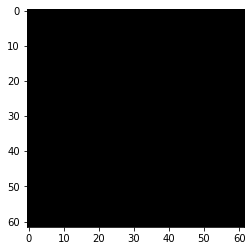

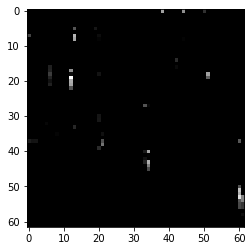

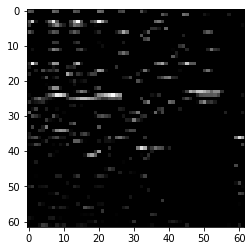

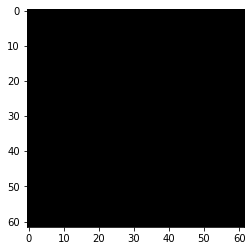

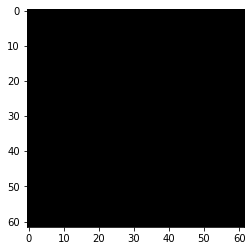

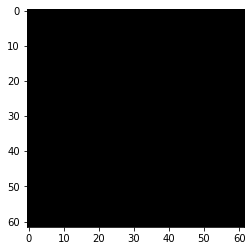

In [172]:
for i in range(0,127):
    temp = features[0,:,:,i]
    plt.imshow(temp,cmap='gray')
    plt.show()